# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_log_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import os

# Loading Data

In [2]:
train_df=pd.read_csv('/content/Train.csv',low_memory=False)
test_df= pd.read_csv('/content/Test.csv',low_memory=False)

# Exploratory data analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [4]:
train_df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,258360
UsageBand,331486
saledate,0


In [5]:
train_df.shape

(401125, 53)

In [7]:
test_df.shape

(12457, 52)

In [8]:
train_df.columns.unique()

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [9]:
test_df.columns.unique()

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

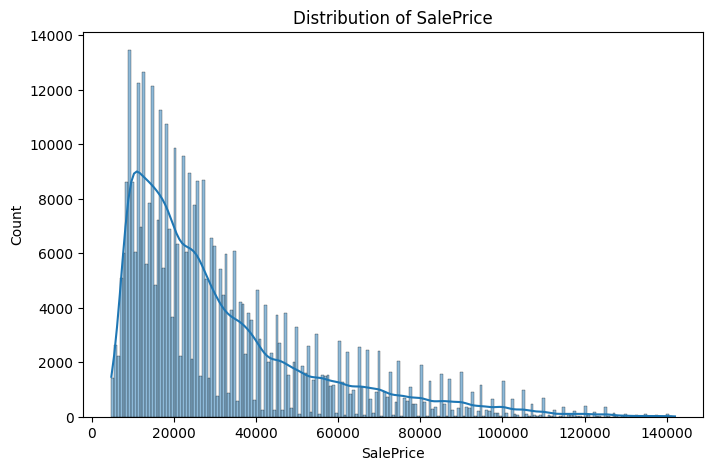

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

Correlation heat-map with Saleprice

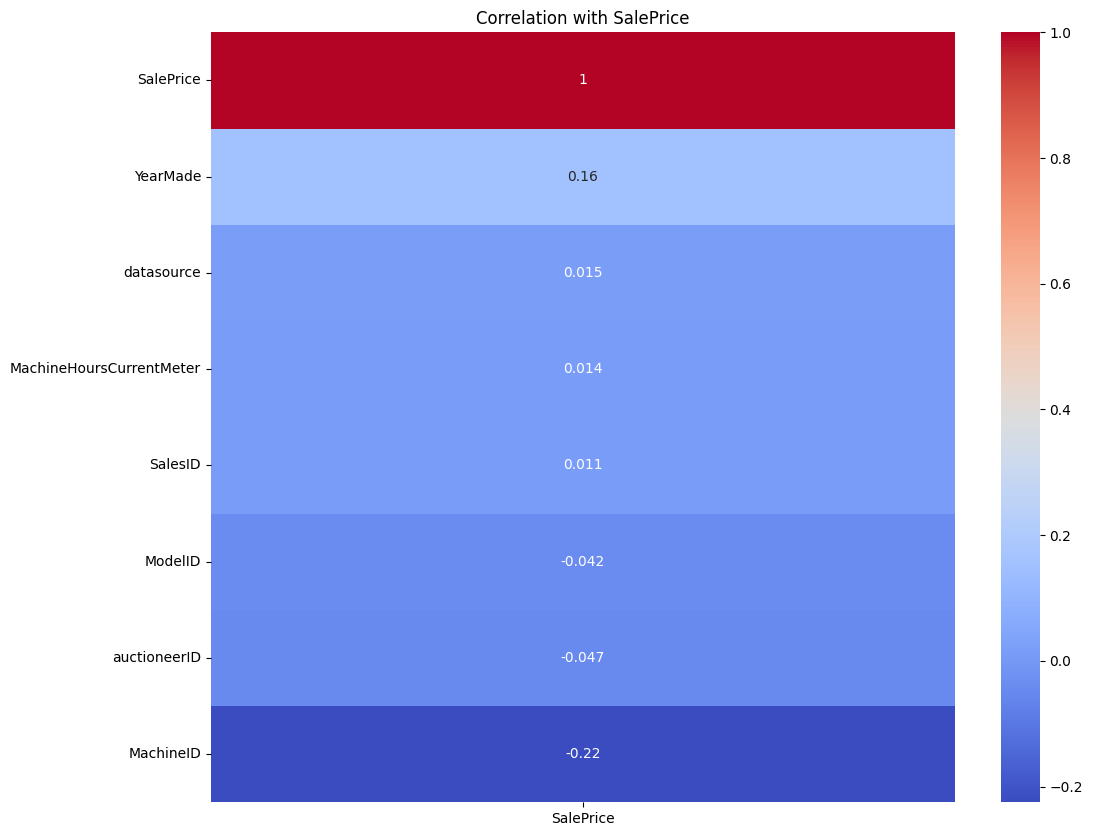

In [11]:
numeric_df = train_df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with SalePrice")
plt.show()

In [12]:
train_df['saledate'].dtype

dtype('O')

In [14]:
# converting saledate column from object to datetime type:
for df in[train_df,test_df]:
  df['saledate']= pd.to_datetime(df['saledate'])
  df['Yearsold']= df['saledate'].dt.year
  df['Monthsold']= df['saledate'].dt.month
  df['Daysold']= df['saledate'].dt.day
  df.drop('saledate',axis=1,inplace=True)
  df.sort_values('Yearsold',inplace=True)

In [15]:
train_df['Yearsold']

,Yearsold
54258,1989
145535,1989
145497,1989
145500,1989
172121,1989
...,...
57,2011
401124,2011
3,2011
401115,2011


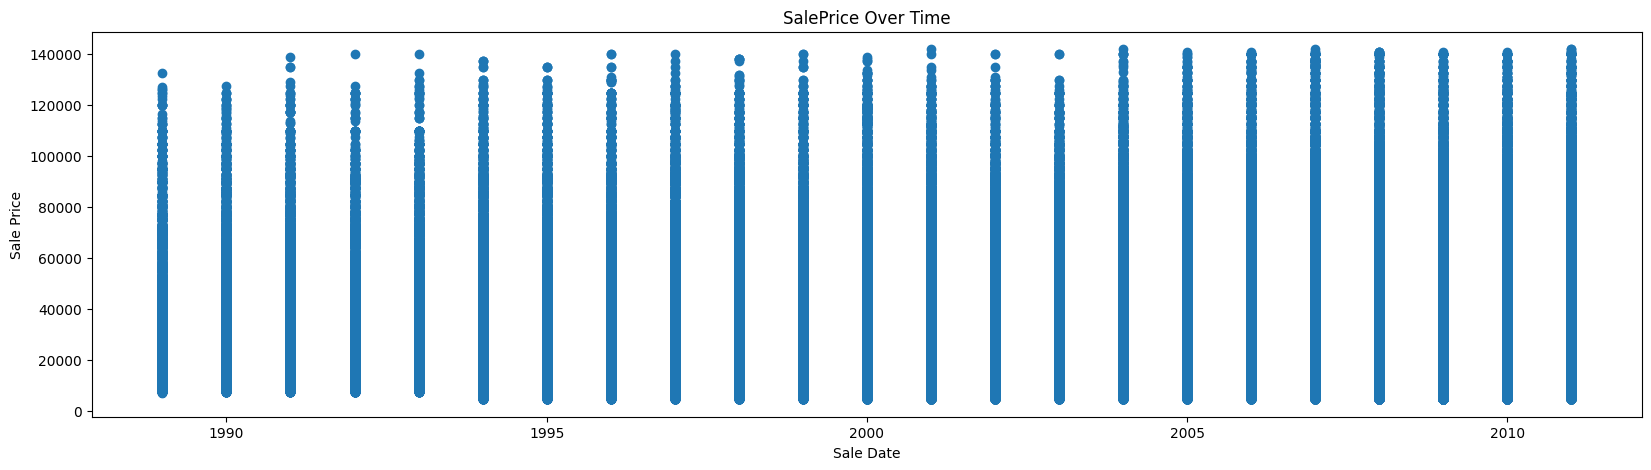

In [16]:
train_df_sorted = train_df.sort_values("Yearsold")
plt.figure(figsize=(20,5))
plt.scatter(train_df['Yearsold'], train_df['SalePrice'])
plt.title("SalePrice Over Time")
plt.xlabel("Sale Date")
plt.ylabel("Sale Price")
plt.show()

In [17]:
train_df.state.value_counts()

,count
state,
Florida,63944
Texas,51682
California,29019
Washington,15955
Georgia,14309
Maryland,12965
Mississippi,12961
Ohio,12190
Colorado,11254


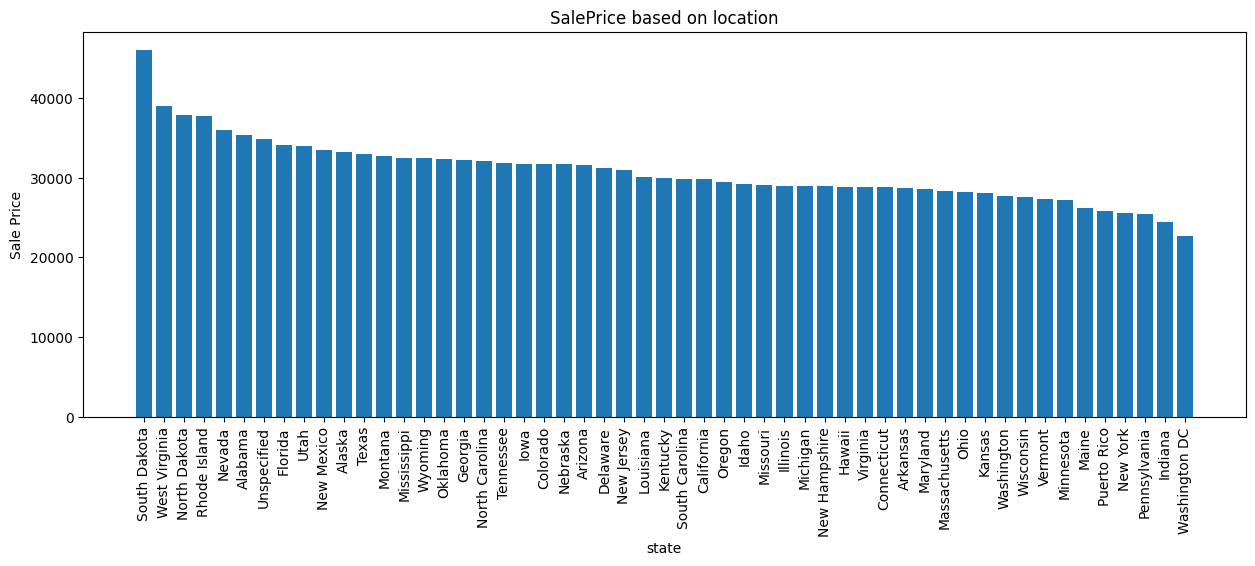

In [18]:
average_saleprice = train_df.groupby('state')['SalePrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(average_saleprice.index, average_saleprice.values)
plt.xticks(rotation=90)
plt.title("SalePrice based on location")
plt.xlabel("state")
plt.ylabel("Sale Price")
plt.show()

# Data Handling (filling missing values, converting data to numerical)

In [19]:
obj_cols= []
for label,content in train_df.items():
  if pd.api.types.is_object_dtype(content):
     obj_cols.append(label)

print(obj_cols)


['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


In [20]:
count_obj= len(obj_cols)

In [21]:
count_obj

44

In [22]:
num_cols=[]
for label,content in train_df.items():
  if pd.api.types.is_numeric_dtype(content):
    num_cols.append(label)
print(num_cols)

['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'Yearsold', 'Monthsold', 'Daysold']


In [23]:
count_num= len(num_cols)

In [24]:
count_num

11

In [26]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(train_df[obj_cols])

# Transform all 3 datasets using the same columns
train_df[obj_cols] = encoder.transform(train_df[obj_cols])
test_df[obj_cols] = encoder.transform(test_df[obj_cols])


Preprocessing

In [27]:
# Remove 'saleprice' from the numerical columns list
if 'SalePrice' in num_cols:
    num_cols.remove('SalePrice')
# Numerical transformer using standardscalar for linear models
numeric_transformer_scalar= sklearn.pipeline.Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())
])

# Numerical transformer without standardscalar for other models
numeric_transformer_NOT_scalar= sklearn.pipeline.Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])
# Categorical transformer
categorical_transformer=sklearn.pipeline.Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=-1)),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [28]:
count_num1= len(num_cols)
count_num1

10

# Building pipelines for each model

In [29]:
#Linear Regression
LR=LinearRegression()
linear_preprocessor= ColumnTransformer(transformers=[
    ('num',numeric_transformer_scalar,num_cols),
    ('cat',categorical_transformer,obj_cols)
])

linear_pipeline= Pipeline(steps=[
    ('preprocessor',linear_preprocessor),
    ('model',LR)
])

In [30]:
#RandomForestRegressor
#We reduced the n_estimators as the computational speed will be very large
Rf=RandomForestRegressor(n_estimators=50,max_depth=10,n_jobs=-1,random_state=42,max_samples=10000)
rf_preprocessor= ColumnTransformer(transformers=[
    ('num',numeric_transformer_NOT_scalar,num_cols),
    ('cat',categorical_transformer,obj_cols)
])

rf_pipeline= Pipeline(steps=[
    ('preprocessor',rf_preprocessor),
    ('model',Rf)
])

In [31]:
#XGBoostRegressor
XGB=XGBRegressor(random_state=42)

xgb_preprocessor= ColumnTransformer(transformers=[
    ('num',numeric_transformer_NOT_scalar,num_cols),
    ('cat',categorical_transformer,obj_cols)
])
xgb_pipeline= Pipeline(steps=[
    ('preprocessor',xgb_preprocessor),
    ('model',XGB)
])

In [32]:
def evaluate_pipeline(pipeline,name,x_train,y_train,x_valid,y_valid):
  pipeline.fit(x_train,y_train)
  y_preds=pipeline.predict(x_valid)
  mse=mean_squared_error(y_valid,y_preds)
  rmse= np.sqrt(mse)
  r2score= r2_score(y_valid,y_preds)
  mae= mean_absolute_error(y_valid,y_preds)
  print(f"Evaluation matrix of {name} is:")
  print(f"RMSE:{rmse:.2f}")
  print(f"R2_score:{r2score:.2f}")
  print(f"MAE:{mae:.2f}")
  return pipeline,y_preds



# Splitting training data

In [33]:
X=train_df.drop('SalePrice',axis=1)
y=train_df['SalePrice']

In [34]:
x_train,x_valid,y_train,y_valid= train_test_split(X,y,test_size=0.2,random_state=42)
x_test=test_df.copy()

# Fitting model's pipelines

In [35]:
%%time
fitted_linear_pipeline, linear_preds=evaluate_pipeline(linear_pipeline,'Linear Regression',x_train,y_train,x_valid,y_valid)

Evaluation matrix of Linear Regression is:
RMSE:17564.79
R2_score:0.42
MAE:12531.32
CPU times: user 3.79 s, sys: 437 ms, total: 4.22 s
Wall time: 3.67 s


In [36]:
%%time
fitted_xgb_pipeline,xgb_preds= evaluate_pipeline(xgb_pipeline,'XGBoost',x_train,y_train,x_valid,y_valid)

Evaluation matrix of XGBoost is:
RMSE:7754.05
R2_score:0.89
MAE:5128.98
CPU times: user 12.1 s, sys: 546 ms, total: 12.7 s
Wall time: 7.51 s


In [37]:
%%time
fitted_rf_pipeline,rf_preds= evaluate_pipeline(rf_pipeline,'Random forest',x_train,y_train,x_valid,y_valid)

Evaluation matrix of Random forest is:
RMSE:9932.75
R2_score:0.82
MAE:6563.93
CPU times: user 10.9 s, sys: 508 ms, total: 11.4 s
Wall time: 7.78 s


# Evaluation on validation data

In [38]:
def compute_metrics(name,y_valid,y_preds):
  mse=mean_squared_error(y_valid,y_preds)
  rmse=float(np.sqrt(mse))
  return {"Model":name,
          "RMSE":rmse,
          "R2_score":r2_score(y_valid,y_preds),
          "MAE":mean_absolute_error(y_valid,y_preds)}



In [39]:
results=[]
results.append(compute_metrics('Linear Regression',y_valid,linear_preds))
results.append(compute_metrics('Random Forest',y_valid,rf_preds))
results.append(compute_metrics('XGBoost',y_valid,xgb_preds))

In [40]:
results_df=pd.DataFrame(results)

In [41]:
results_df

,Model,RMSE,R2_score,MAE
0,Linear Regression,17564.791777,0.422129,12531.319497
1,Random Forest,9932.748727,0.815208,6563.927546
2,XGBoost,7754.048233,0.887384,5128.984375


In [42]:
melted_df=results_df.melt(id_vars='Model',value_vars=["RMSE","MAE"],var_name=('Metrics'),value_name='Score')

In [43]:
melted_df

,Model,Metrics,Score
0,Linear Regression,RMSE,17564.791777
1,Random Forest,RMSE,9932.748727
2,XGBoost,RMSE,7754.048233
3,Linear Regression,MAE,12531.319497
4,Random Forest,MAE,6563.927546
5,XGBoost,MAE,5128.984375


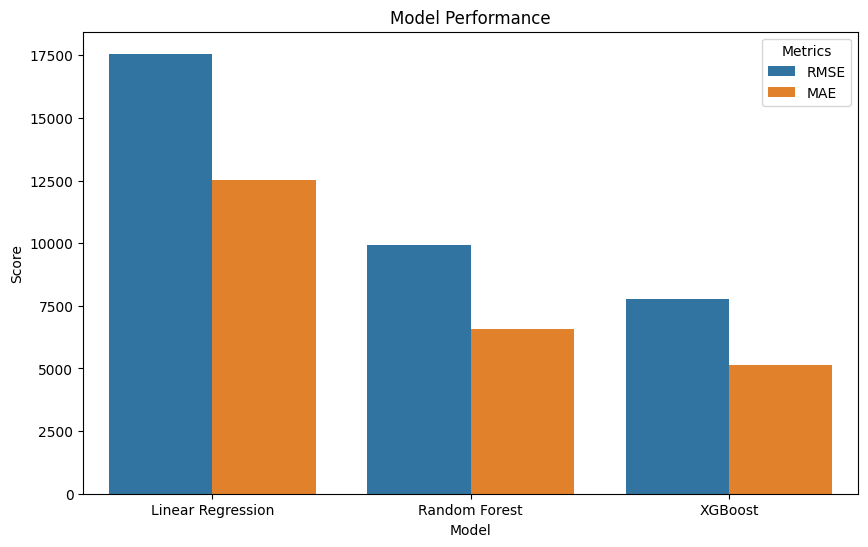

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=melted_df,x='Model',y='Score',hue='Metrics')
plt.title('Model Performance')
plt.ylabel('Score')
plt.show()

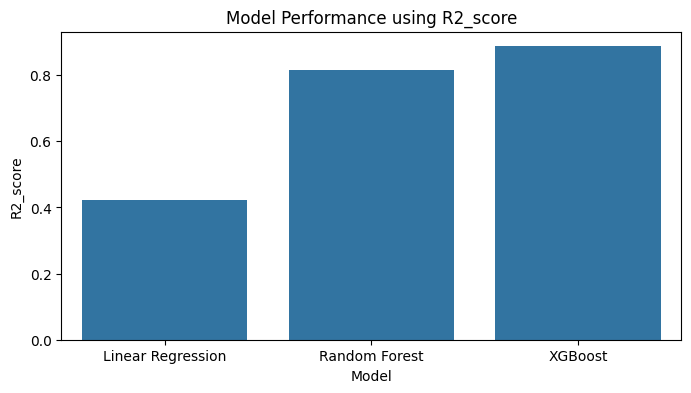

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(data=results_df,x='Model',y='R2_score')
plt.title('Model Performance using R2_score')
plt.ylabel('R2_score')
plt.show()

We observe that the RandomForestRegressor has the least performance score and lowest computational speed we decide to continue with the XGBoost Regressor

# RMSLE

In [46]:
def calculate_rmsle(y_true,y_preds):
  return np.sqrt(mean_squared_log_error(y_true,np.maximum(0,y_preds)))

In [47]:
XGB_base_rmsle=calculate_rmsle(y_valid,xgb_preds)

In [48]:
print(XGB_base_rmsle)

0.2625012301234532


# Hyperparameter tuning using RandomizedSearchCV

In [49]:
XGB_grid= {
    'model__n_estimators': list(np.arange(100,300,100)),
    'model__max_depth': list(np.arange(5,10)),
    'model__learning_rate': list(np.arange(0.05,0.25,0.05))
}


In [50]:
XGB_RS= RandomizedSearchCV(estimator=xgb_pipeline,
                           param_distributions=XGB_grid,
                           cv=3,
                           verbose=2,
                           n_iter=10,
                           n_jobs=-1)

In [51]:
XGB_RS.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['SalesID',
                                                                                'MachineID',
                                                                                'ModelID',
                                                                                'datasource',
                                                                                'auctioneerID',
                                                                                'YearMade',
                                                                                'MachineHoursCurrentMeter',
                                                                                'Yearsold',
                                                                                'Monthsold',
                                                                                'Daysold']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(...
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [np.float64(0.05),
                                                                 np.float64(0.1),
                                                                 np.float64(0.15000000000000002),
                                                                 np.float64(0.2)],
                                        'model__max_depth': [np.int64(5),
                                                             np.int64(6),
                                                             np.int64(7),
                                                             np.int64(8),
                                                             np.int64(9)],
                                        'model__n_estimators': [np.int64(100),
                                                                np.int64(200)]},
                   verbose=2)

In [52]:
best_XGB= XGB_RS.best_estimator_
best_params= XGB_RS.best_params_
best_params

{'model__n_estimators': np.int64(100),
 'model__max_depth': np.int64(9),
 'model__learning_rate': np.float64(0.15000000000000002)}

In [53]:
y_best_preds=best_XGB.predict(x_valid)

In [54]:
compute_metrics('Best XGBoost',y_valid,y_best_preds)

{'Model': 'Best XGBoost',
 'RMSE': 7115.5050418083465,
 'R2_score': 0.9051676988601685,
 'MAE': 4600.4794921875}

In [55]:
XGB_best_rmsle=calculate_rmsle(y_valid,y_best_preds)

In [56]:
results_XGB_base=compute_metrics('XGBoost',y_valid,xgb_preds)
results_XGB_best=compute_metrics('Best XGBoost',y_valid,y_best_preds)

In [57]:
results_XGB_base_df=pd.DataFrame([results_XGB_base])
results_XGB_best_df=pd.DataFrame([results_XGB_best])

In [58]:
results_XGB_base_df["RMSLE"]=XGB_base_rmsle
results_XGB_best_df["RMSLE"]=XGB_best_rmsle

In [59]:
results_XGB_base_df

,Model,RMSE,R2_score,MAE,RMSLE
0,XGBoost,7754.048233,0.887384,5128.984375,0.262501


In [60]:
results_XGB_best_df

,Model,RMSE,R2_score,MAE,RMSLE
0,Best XGBoost,7115.505042,0.905168,4600.479492,0.223137


In [61]:
XGB_compare=pd.concat([results_XGB_base_df,results_XGB_best_df],axis=0)

In [62]:
XGB_compare

,Model,RMSE,R2_score,MAE,RMSLE
0,XGBoost,7754.048233,0.887384,5128.984375,0.262501
0,Best XGBoost,7115.505042,0.905168,4600.479492,0.223137


In [63]:
XGB_melted_df_0=XGB_compare.melt(id_vars='Model',var_name='Metrics',value_name='Score',value_vars=['RMSLE','R2_score'])

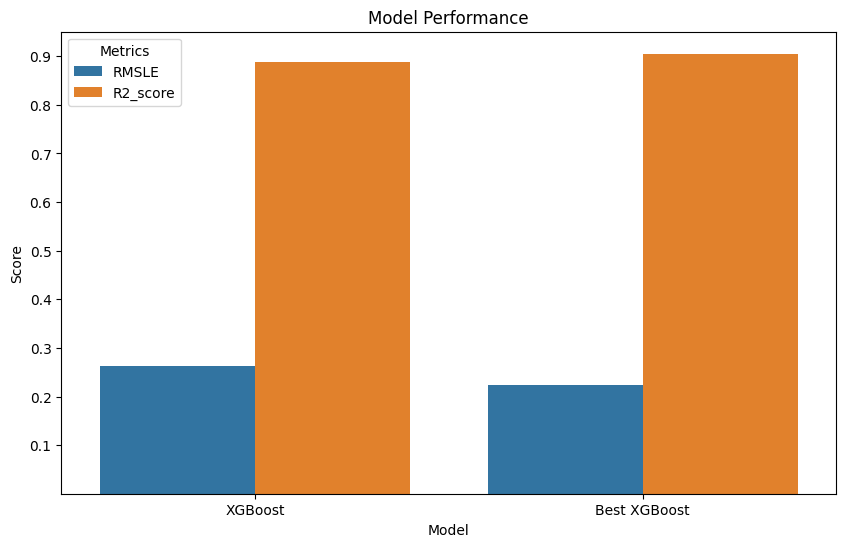

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(data=XGB_melted_df_0,x='Model',y='Score',hue='Metrics')
plt.title('Model Performance')
plt.ylabel('Score')
plt.yticks(np.arange(0.1,1.0,0.1))
plt.show()

# Feature Importance

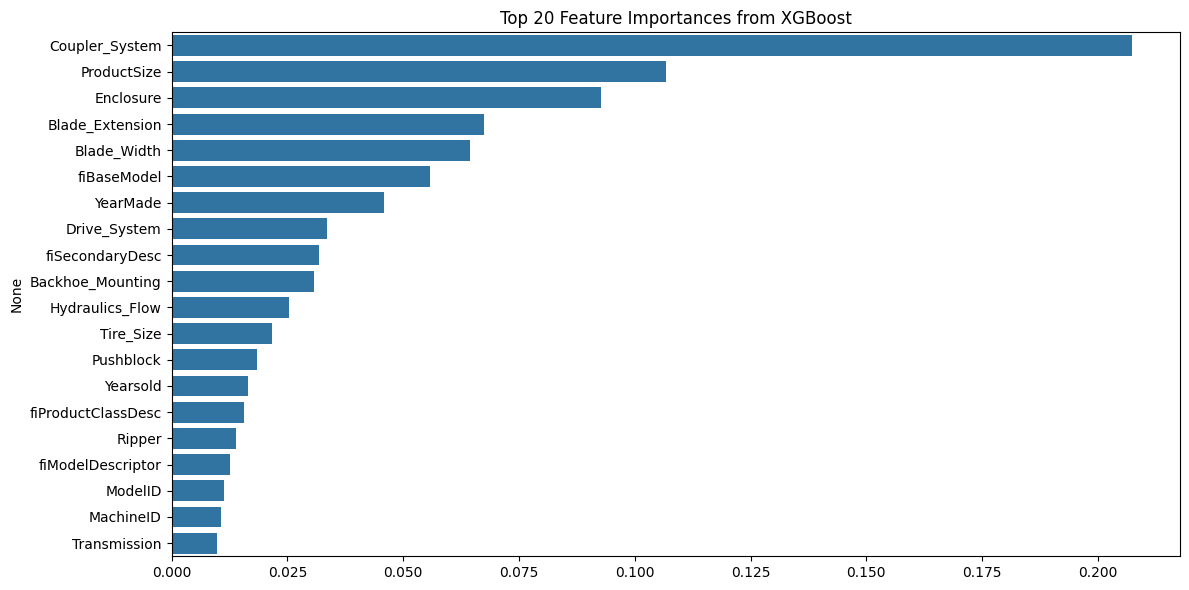

In [65]:
xgb_model = fitted_xgb_pipeline.named_steps["model"]
feature_names = num_cols + obj_cols
importances = xgb_model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp[:20].values, y=feat_imp[:20].index)
plt.title("Top 20 Feature Importances from XGBoost")
plt.tight_layout()
plt.show()


# Predictions on test data

In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12457 entries, 12440 to 0
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 1834 non-null   float64
 8   fiModelDesc               12457 non-null  float64
 9   fiBaseModel               12457 non-null  float64
 10  fiSecondaryDesc           8482 non-null   float64
 11  fiModelSeries             2006 non-null   float64
 12  fiModelDescriptor         3024 non-null   float64
 13  ProductSize               6048 non-null   float64
 14  fiProductCl

In [67]:
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Yearsold,Monthsold,Daysold
12440,6642418,1943363,20108,149,99,1988,5603.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,10,27
12441,6642433,2552775,12533,149,1,1993,NaN,NaN,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,2012,9,27
12442,6642434,2552792,10918,149,1,1986,NaN,NaN,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,2012,10,11
12443,6642710,1908587,20236,149,1,2003,NaN,NaN,-1.0,-1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,2012,10,11
12444,6642711,2550264,20237,149,1,2004,NaN,NaN,-1.0,-1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,2012,8,16


In [68]:
test_preds= best_XGB.predict(test_df)

In [69]:
final_preds=pd.DataFrame()
final_preds['SalesID']= test_df['SalesID']
final_preds['SalePrice']= test_preds

In [70]:
final_preds.head()

,SalesID,SalePrice
12440,6642418,16203.250977
12441,6642433,15756.518555
12442,6642434,15663.916992
12443,6642710,22736.339844
12444,6642711,18687.480469


# Saving

Export Predictions data

In [71]:
final_preds.to_csv('final_preds.csv',index=False)

In [72]:
os.makedirs('saved_models',exist_ok=True)

In [73]:
joblib.dump(best_XGB,'saved_models/best_XGB.pkl')
joblib.dump(fitted_linear_pipeline,'saved_models/linear_pipeline.pkl')
joblib.dump(fitted_rf_pipeline,'saved_models/rf_pipeline.pkl')
joblib.dump(fitted_xgb_pipeline,'saved_models/xgb_pipeline.pkl')



['saved_models/xgb_pipeline.pkl']